In [55]:
import sys
import sklearn
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
from sklearn.ensemble import StackingClassifier

In [56]:
dataset = pd.read_csv('CICIDS2017_18.csv')
dataset.dropna()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804483 entries, 0 to 804482
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   S.no                          804483 non-null  int64  
 1   Conc                          804483 non-null  float64
 2    Destination Port             804483 non-null  int64  
 3    Total Fwd Packets            804483 non-null  int64  
 4    Fwd Packet Length Mean       804483 non-null  float64
 5    Flow Duration                804483 non-null  float64
 6    Total Backward Packets       804483 non-null  int64  
 7   Total Length of Fwd Packets   804483 non-null  int64  
 8    Total Length of Bwd Packets  804483 non-null  int64  
 9    Fwd Packet Length Max        804483 non-null  int64  
 10   Fwd Packet Length Min        804483 non-null  int64  
 11   Fwd Packet Length Std        804483 non-null  float64
 12  Bwd Packet Length Max         804483 non-nul

In [57]:
#The column to be converted to numeric data
Column = [' Label']

encoders = {}
for col in Column:
    encoders[col] = LabelEncoder()
    dataset[col] = encoders[col].fit_transform(dataset[col])

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804483 entries, 0 to 804482
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   S.no                          804483 non-null  int64  
 1   Conc                          804483 non-null  float64
 2    Destination Port             804483 non-null  int64  
 3    Total Fwd Packets            804483 non-null  int64  
 4    Fwd Packet Length Mean       804483 non-null  float64
 5    Flow Duration                804483 non-null  float64
 6    Total Backward Packets       804483 non-null  int64  
 7   Total Length of Fwd Packets   804483 non-null  int64  
 8    Total Length of Bwd Packets  804483 non-null  int64  
 9    Fwd Packet Length Max        804483 non-null  int64  
 10   Fwd Packet Length Min        804483 non-null  int64  
 11   Fwd Packet Length Std        804483 non-null  float64
 12  Bwd Packet Length Max         804483 non-nul

In [58]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                             S.no      Conc   Destination Port  \
S.no                     1.000000  0.004239          -0.103287   
Conc                     0.004239  1.000000           0.058289   
 Destination Port       -0.103287  0.058289           1.000000   
 Total Fwd Packets       0.060959  0.197494          -0.015606   
 Fwd Packet Length Mean -0.099802  0.167529           0.182563   
...                           ...       ...                ...   
 Idle Std               -0.001617  0.000037          -0.000706   
 Idle Max               -0.005559 -0.000082          -0.001379   
 Idle Min               -0.240995 -0.003770          -0.044988   
 Label                   0.126531 -0.020662          -0.245293   
attack                   0.488421 -0.021436          -0.348081   

                          Total Fwd Packets   Fwd Packet Length Mean  \
S.no                               0.060959                -0.099802   
Conc                               0.197494                 0.1

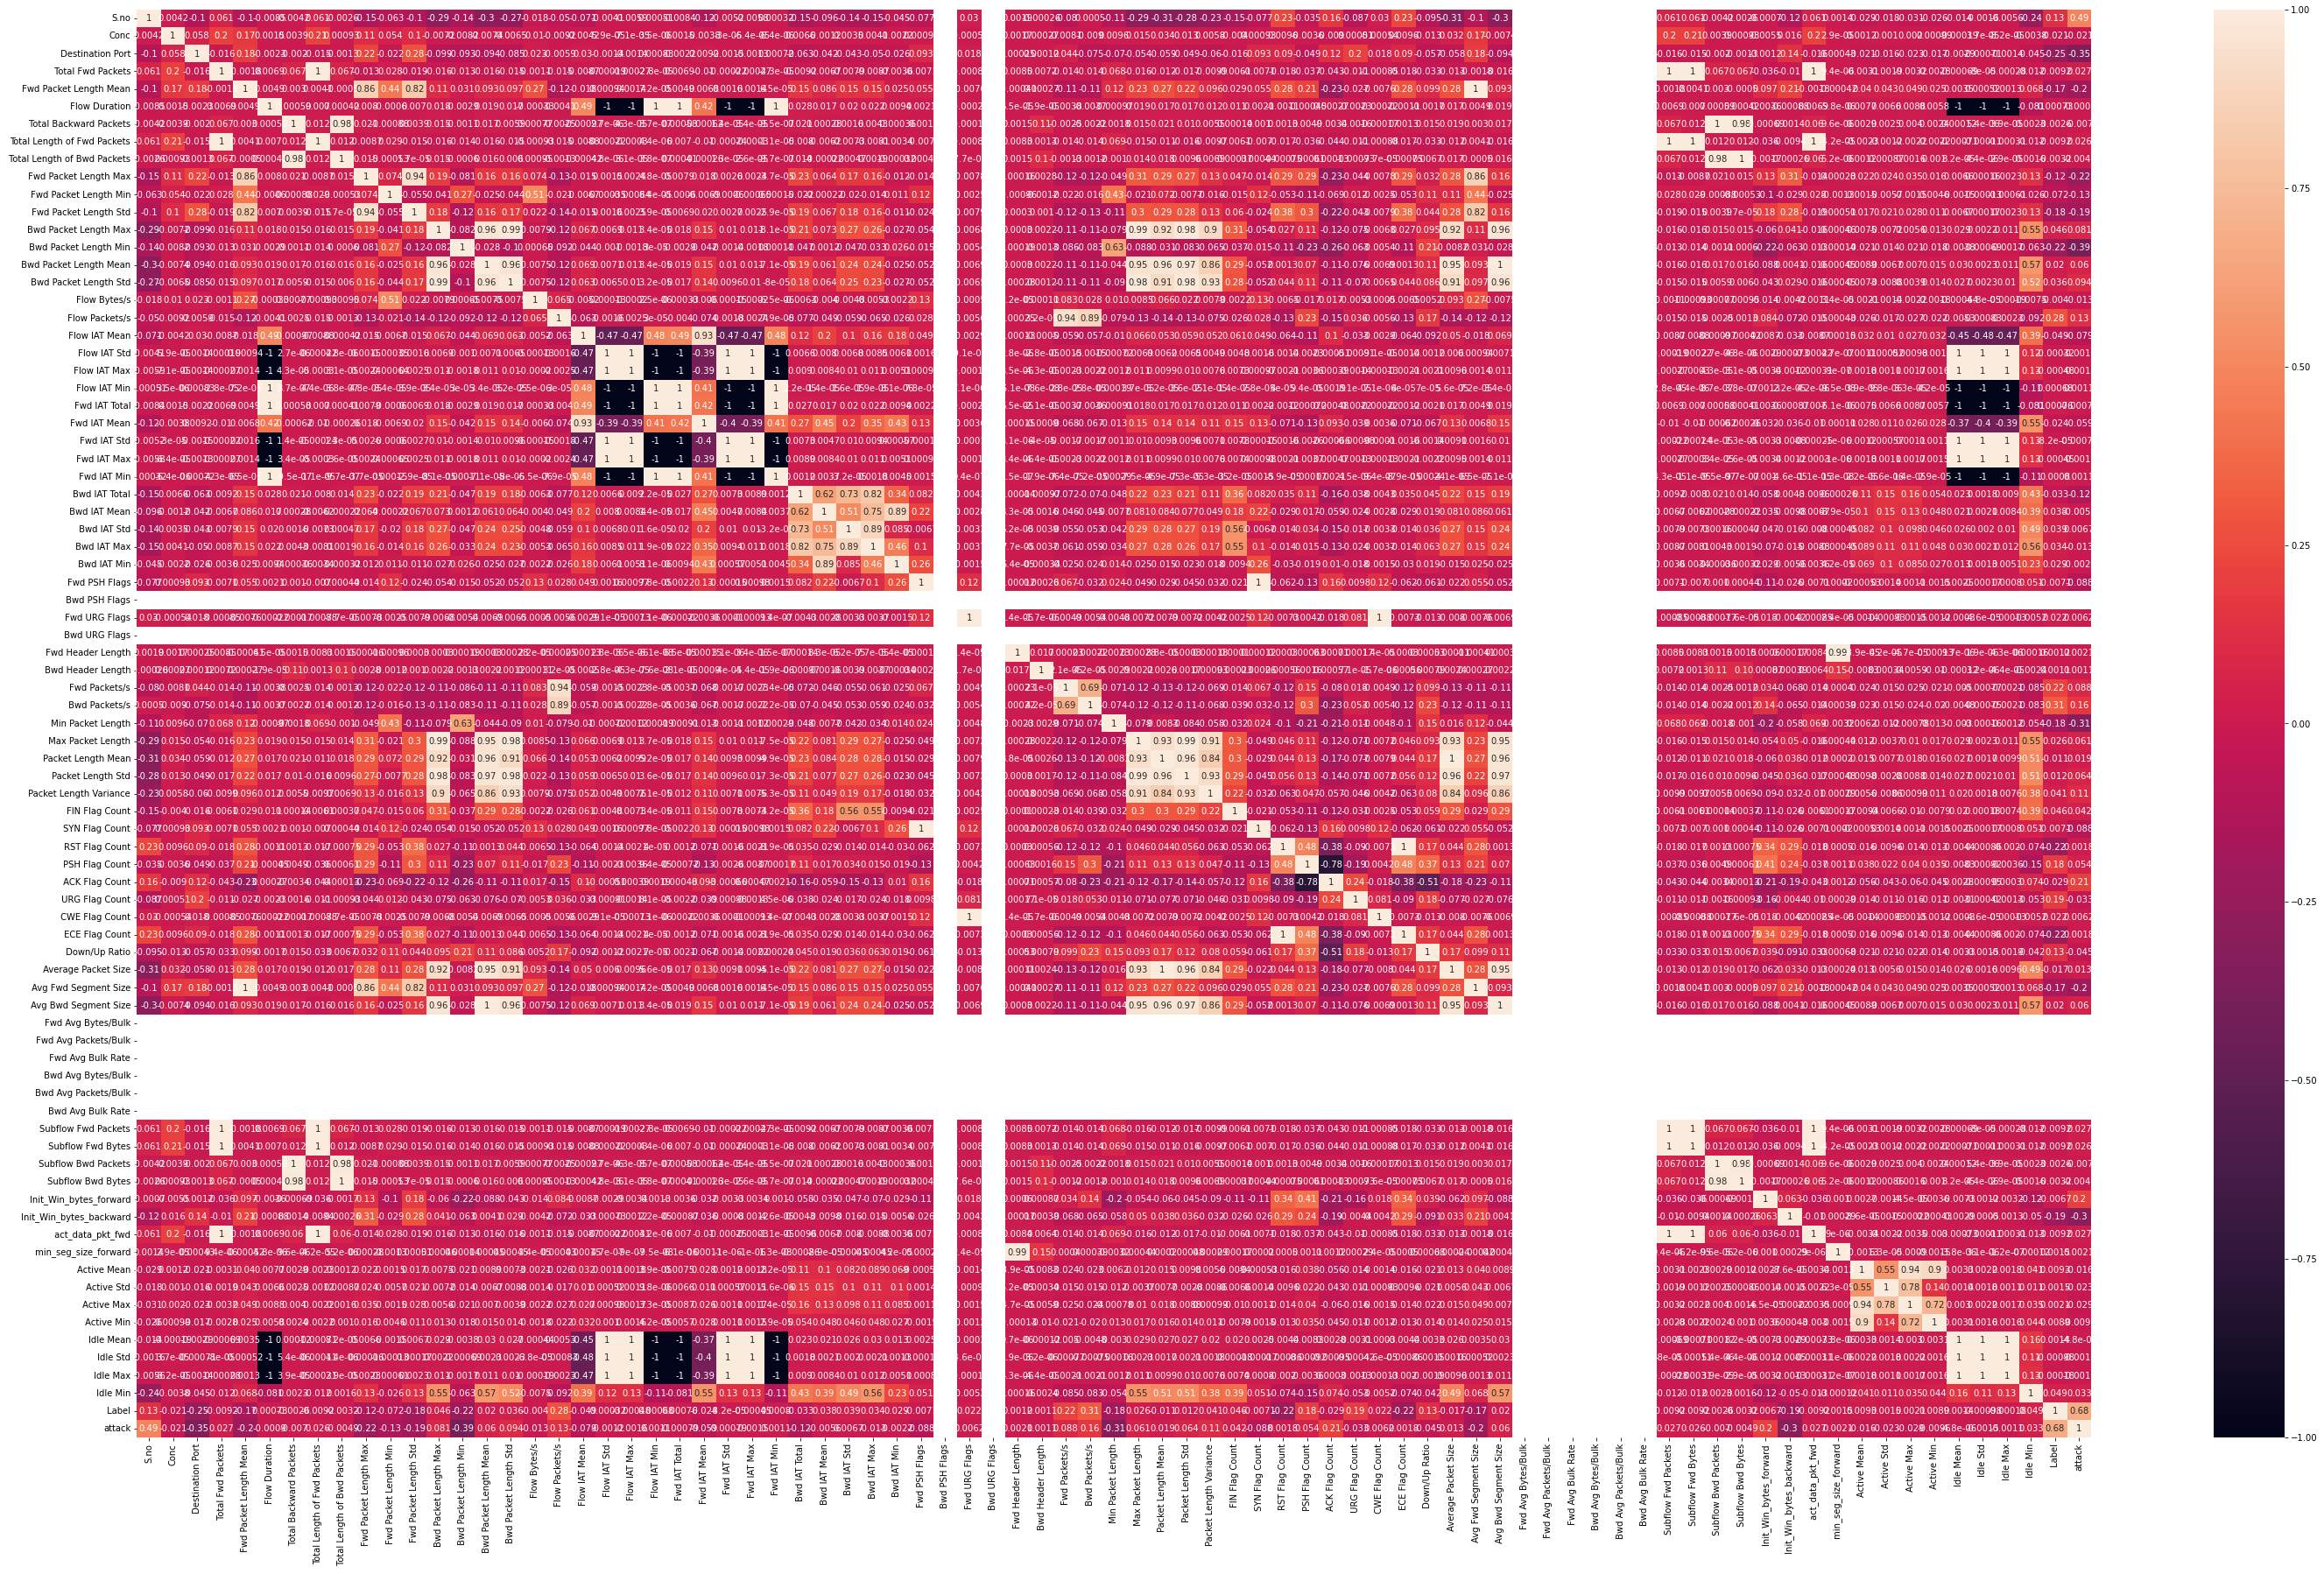

In [59]:
plt.figure(figsize=(50,30))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [61]:
dataset = pd.read_csv('CICIDS2017_18.csv')


grouped_data = dataset.groupby([' Destination Port',' Total Fwd Packets',' Flow Duration',' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Packet Length Mean','Init_Win_bytes_forward',' Init_Win_bytes_backward',' Bwd Packets/s',' Label'])
aggregation_functions = {'Conc': 'count'}

dataset_new = grouped_data.agg(aggregation_functions).reset_index()
dataset_new.to_csv('updated_dataset.csv', index=False)

print(dataset_new.head())

    Destination Port   Total Fwd Packets   Flow Duration  \
0                  0                   1            20.0   
1                  0                   1            22.0   
2                  0                   1            61.0   
3                  0                   1            65.0   
4                  0                   1            69.0   

    Total Backward Packets   Total Length of Bwd Packets  \
0                        1                             0   
1                        1                             0   
2                        1                             0   
3                        1                             0   
4                        1                             0   

    Fwd Packet Length Mean  Init_Win_bytes_forward   Init_Win_bytes_backward  \
0                      0.0                      -1                        -1   
1                      0.0                      -1                        -1   
2                      0.0            

                             S.no      Conc   Destination Port  \
S.no                     1.000000  0.004239          -0.103287   
Conc                     0.004239  1.000000           0.058289   
 Destination Port       -0.103287  0.058289           1.000000   
 Total Fwd Packets       0.060959  0.197494          -0.015606   
 Fwd Packet Length Mean -0.099802  0.167529           0.182563   
...                           ...       ...                ...   
Idle Mean               -0.013509 -0.000195          -0.002869   
 Idle Std               -0.001617  0.000037          -0.000706   
 Idle Max               -0.005559 -0.000082          -0.001379   
 Idle Min               -0.240995 -0.003770          -0.044988   
attack                   0.488421 -0.021436          -0.348081   

                          Total Fwd Packets   Fwd Packet Length Mean  \
S.no                               0.060959                -0.099802   
Conc                               0.197494                 0.1

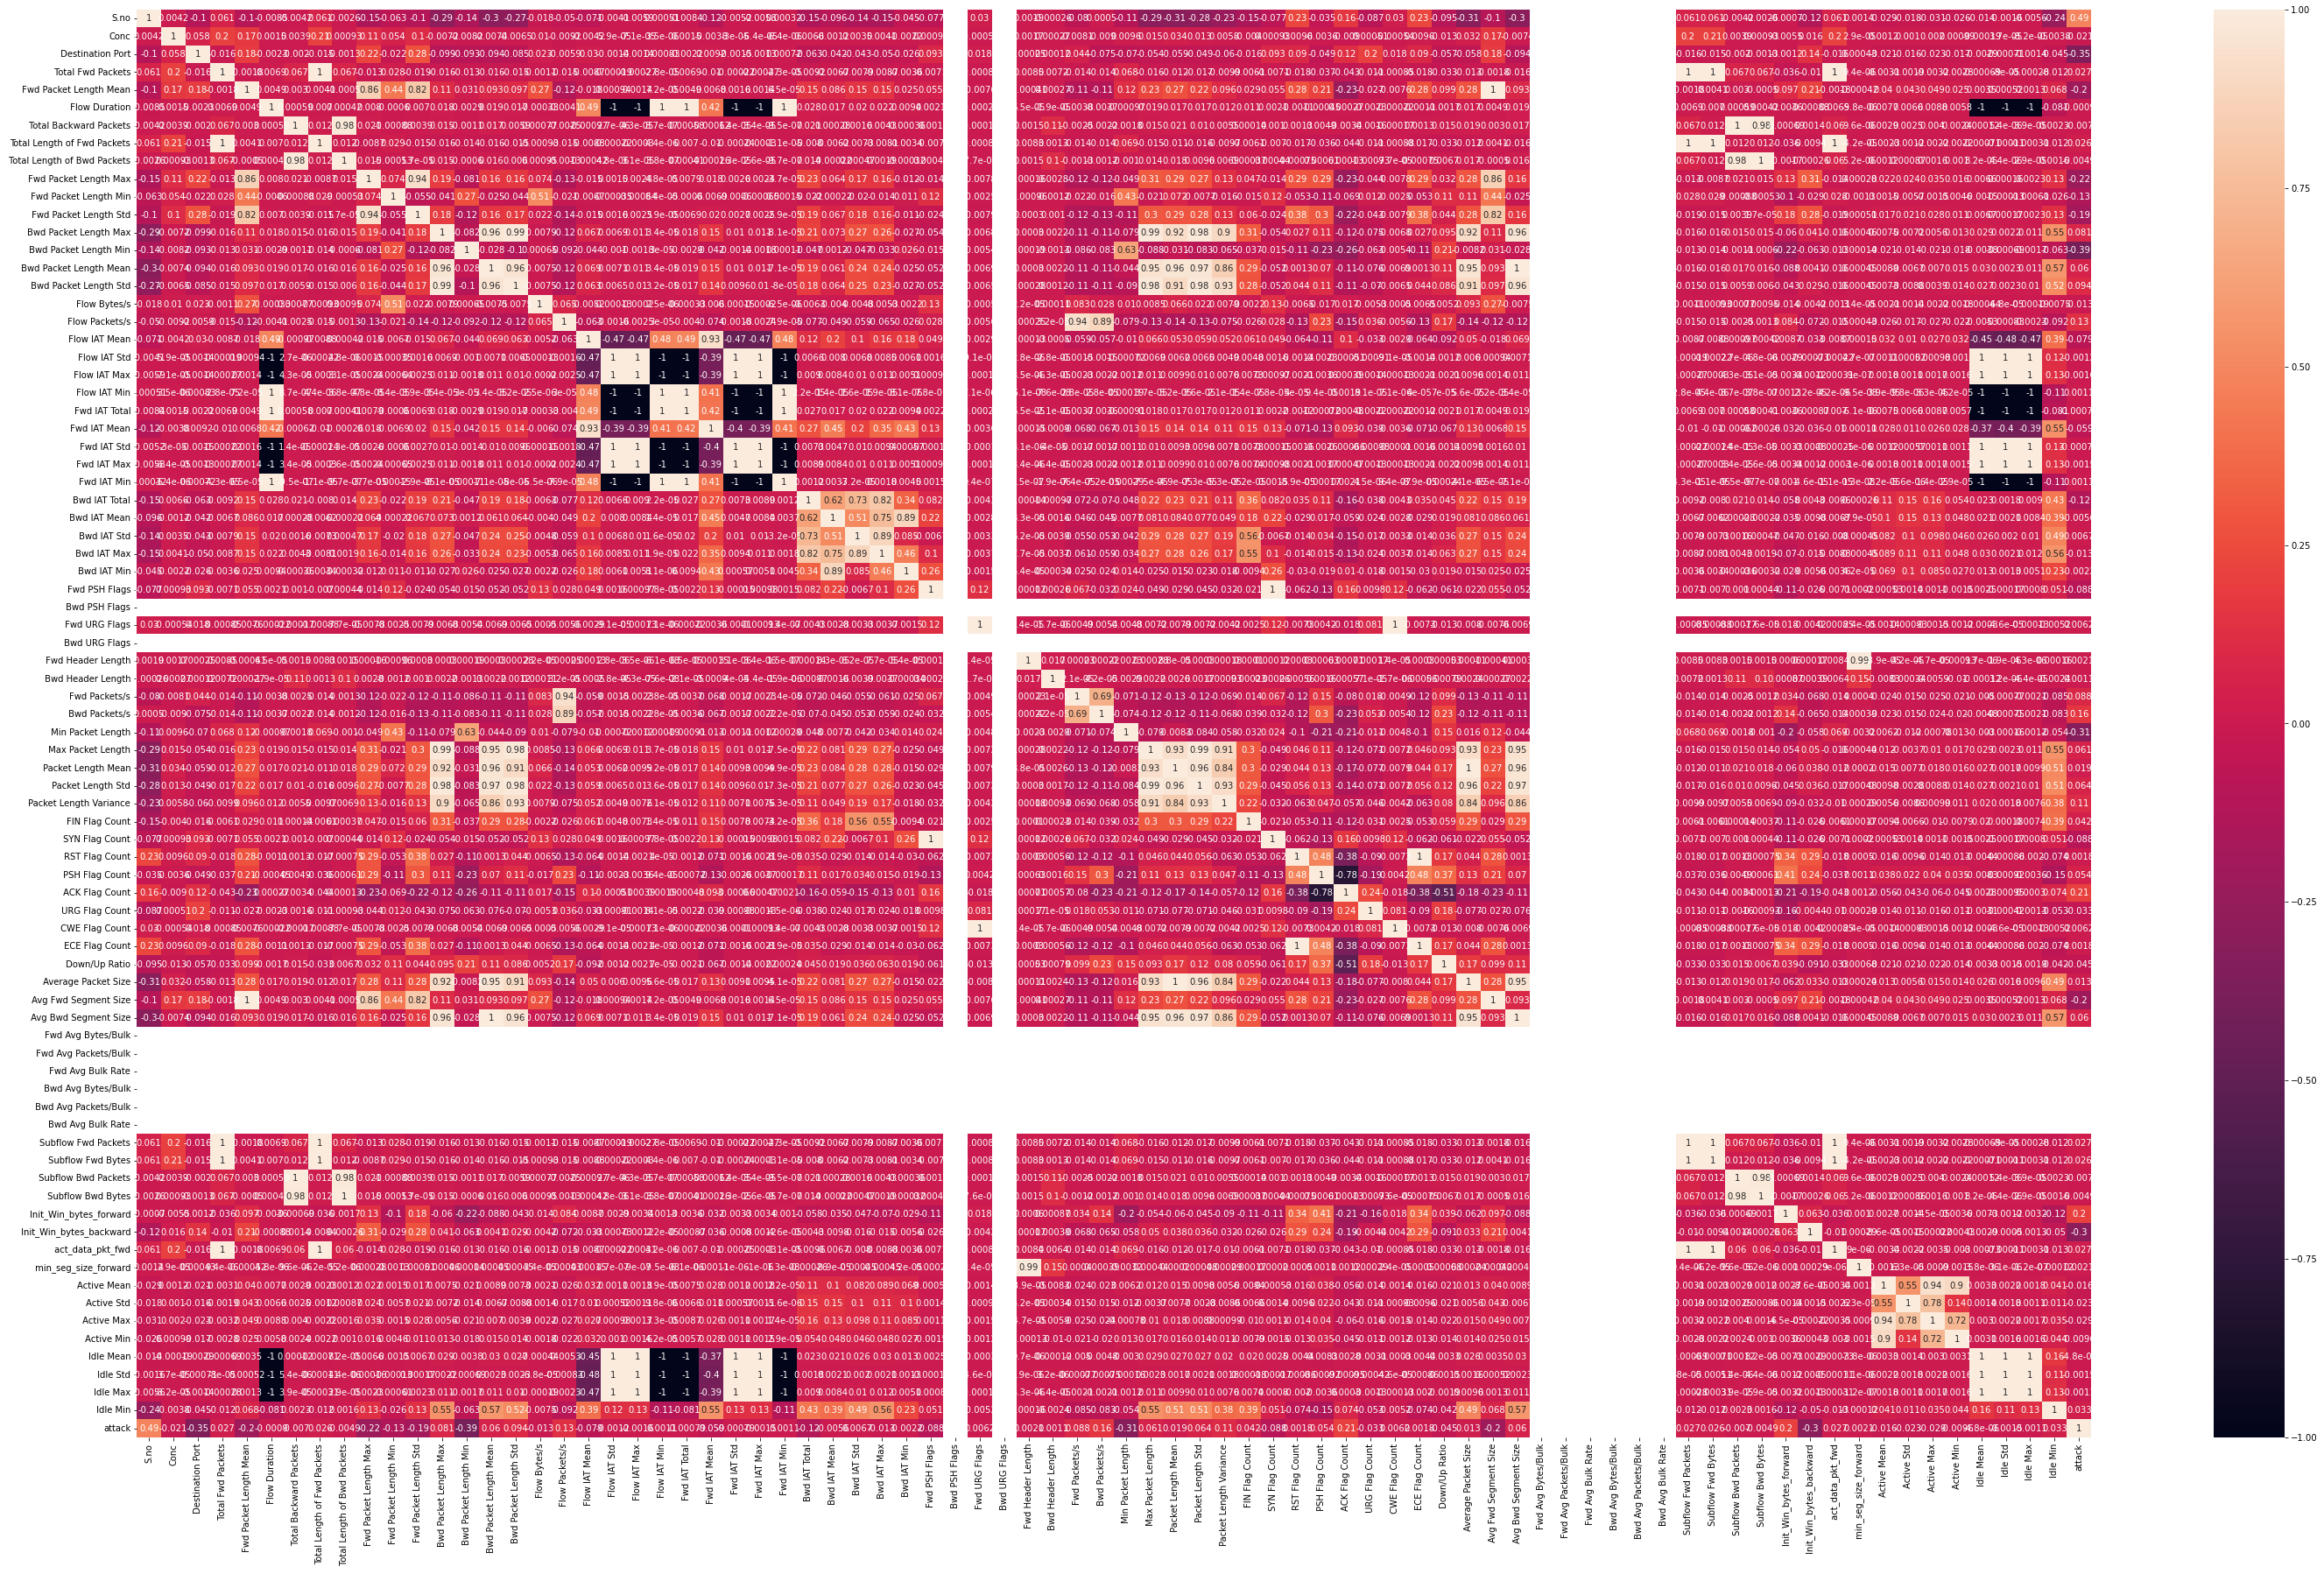

In [62]:
correlation_matrix = dataset.corr()
print(correlation_matrix)
plt.figure(figsize=(50,30))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [63]:
categorical_cols = [' Label']

encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    dataset[col] = encoders[col].fit_transform(dataset[col])

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804483 entries, 0 to 804482
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   S.no                          804483 non-null  int64  
 1   Conc                          804483 non-null  float64
 2    Destination Port             804483 non-null  int64  
 3    Total Fwd Packets            804483 non-null  int64  
 4    Fwd Packet Length Mean       804483 non-null  float64
 5    Flow Duration                804483 non-null  float64
 6    Total Backward Packets       804483 non-null  int64  
 7   Total Length of Fwd Packets   804483 non-null  int64  
 8    Total Length of Bwd Packets  804483 non-null  int64  
 9    Fwd Packet Length Max        804483 non-null  int64  
 10   Fwd Packet Length Min        804483 non-null  int64  
 11   Fwd Packet Length Std        804483 non-null  float64
 12  Bwd Packet Length Max         804483 non-nul

[1 1 1 ... 1 0 0]
Precision: 0.8009497405435316
Accuracy: 0.7928560418852333
Recall: 0.9567713040780261
F1_score: 0.8719537495504965
TP : 17611  TN : 141849  FP : 35252  FN : 6409
area under curve : 0.8767115915572892


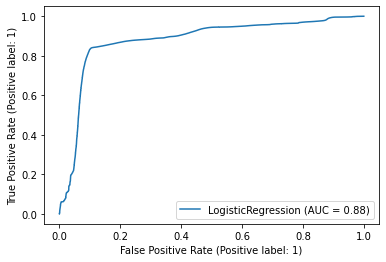

In [64]:
warnings.filterwarnings("ignore")

labels = dataset[["attack"]]
X1 = dataset
y1 = labels
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)

LR = LogisticRegression()
LR.fit(X_train1, y_train1)
y_pred = LR.predict(X_test1)
print(y_pred)

Precision = metrics.precision_score(y_test1, y_pred)
Accuracy = metrics.accuracy_score(y_test1, y_pred)
Sensitivity_recall = metrics.recall_score(y_test1, y_pred)
Specificity = metrics.recall_score(y_test1,y_pred)
F1_score = metrics.f1_score(y_test1, y_pred)


print(f"Precision:",Precision)
print(f"Accuracy:",Accuracy)
print(f"Recall:",Sensitivity_recall)                                                                                                                                           
print(f"F1_score:",F1_score)

cm2 = confusion_matrix(y_test1,y_pred)
TP2 = cm2[0][0]
TN2 = cm2[1][1]
FP2 = cm2[0][1]
FN2 = cm2[1][0]
print("TP :", TP2, " TN :", TN2, " FP :", FP2, " FN :", FN2 )

  

metrics.plot_roc_curve(LR,X_test1,y_test1)
prob1 = LR.predict_proba(X_test1)[::,1]
auc1 = metrics.roc_auc_score(y_test1,prob1)
print("area under curve :", auc1)

[1 0 1 ... 0 1 1]
Precision: 0.9874390414285429
Accuracy: 0.9906126162857185
Recall: 1.0
F1_score: 0.9936798269986542


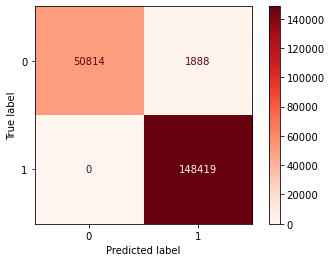

area under curve : 1.0


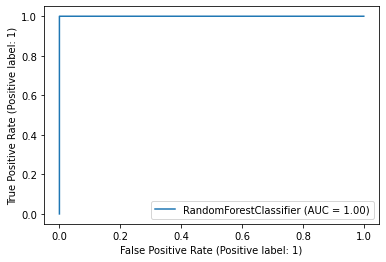

In [65]:
warnings.filterwarnings("ignore")
labels = dataset[["attack"]]
X2 = dataset
y2 = labels
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

RFC = RandomForestClassifier(max_depth=2, random_state=42)
RFC.fit(X_train2, y_train2)
y_pred2 = RFC.predict(X_test2)

print(y_pred2)

#this is to get the precison, accuracy, F1_score, sensitivity and specificity
Precision = metrics.precision_score(y_test2, y_pred2)
Accuracy = metrics.accuracy_score(y_test2, y_pred2)
Sensitivity_recall = metrics.recall_score(y_test2, y_pred2)
Specificity = metrics.recall_score(y_test2, y_pred2)
F1_score = metrics.f1_score(y_test2, y_pred2)


print(f"Precision:",Precision)
print(f"Accuracy:",Accuracy)
print(f"Recall:",Sensitivity_recall)
print(f"F1_score:",F1_score)


color = 'white'
matrix = plot_confusion_matrix(RFC, X_test2, y_test2, cmap=plt.cm.Reds)
plt.show()

metrics.plot_roc_curve(RFC,X_test2,y_test2)
prob2 = RFC.predict_proba(X_test2)[::,1]
auc2 = metrics.roc_auc_score(y_test2,prob2)
print("area under curve :", auc2)

Precision: 0.7372427543618021
Accuracy: 0.7372427543618021
Recall: 1.0
F1_score: 0.848750415001889


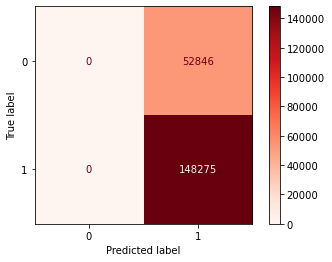

area under curve : 0.5


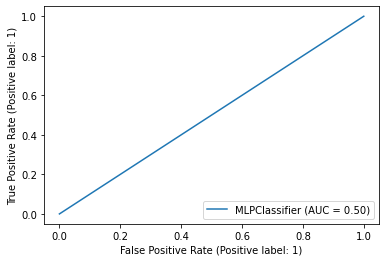

In [68]:
warnings.filterwarnings("ignore")

# Preprocess the data
labels = dataset[["attack"]]
X3 = dataset
y3 = labels
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

# Build the MLP model
NN = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)

# Train the model
NN.fit(X_train3, y_train3)
y_pred = NN.predict(X_test3)
# Evaluate the model

Precision = precision_score(y_test3, y_pred)
Accuracy = accuracy_score(y_test3, y_pred)
Sensitivity_recall = recall_score(y_test3,y_pred)
F1_score = f1_score(y_test3, y_pred)


print(f"Precision:",Precision)
print(f"Accuracy:",Accuracy)
print(f"Recall:",Sensitivity_recall)
print(f"F1_score:",F1_score)

color = 'white'
matrix = plot_confusion_matrix(NN, X_test3, y_test3, cmap=plt.cm.Reds)
plt.show()

metrics.plot_roc_curve(NN,X_test3,y_test3)
prob3 = NN.predict_proba(X_test3)[::,1]
auc3 = metrics.roc_auc_score(y_test3,prob3)
print("area under curve :", auc3)

In [67]:
warnings.filterwarnings("ignore")

X4 = dataset
y4 = labels
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

# Define base models
Base_models = [('RFC', RandomForestClassifier(random_state=42)),
              ('LR', LogisticRegression(random_state=42)),
              ('NN',MLPClassifier(random_state=42))]

Meta_Model = LogisticRegression(random_state=42)


ensemble_stacking_model = StackingClassifier(Base_models, Meta_Model)
ensemble_stacking_model.fit(X_train4, y_train4)
ensemble_stacking_preds = ensemble_stacking_model.predict(X_test4)

# Evaluate the accuracy of the stacked model predictions
precision = precision_score(y_test4, ensemble_stacking_preds)
accuracy = accuracy_score(y_test4, ensemble_stacking_preds)
recall = recall_score(y_test4, ensemble_stacking_preds)
F1_score = f1_score(y_test4, ensemble_stacking_preds)

print("Ensemble stacking model precision:", precision)
print("Ensemble stacking model accuracy:", accuracy)
print("Ensemble stacking model recall:", recall)
print("Ensemble stacking model F1-score:", F1_score)


color = 'white'
matrix = plot_confusion_matrix(ensemble_stacking_model, X_test4, y_test4, cmap=plt.cm.Reds)
plt.show()

metrics.plot_roc_curve(ensemble_stacking_model,X_test4,y_test4)
prob4 = ensemble_stacking_model.predict_proba(X_test4)[::,1]
auc4 = metrics.roc_auc_score(y_test4,prob4)
print("area under curve :", auc4)

KeyboardInterrupt: 